In [1]:
import sklearn
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt


train_dataset,info = tfds.load('horses_or_humans', with_info = True, split='train', as_supervised=True)
val_dataset,val_info = tfds.load("horses_or_humans", with_info=True, split='test', as_supervised=True)

In [2]:
train_dataset = train_dataset.shuffle(100).batch(32)
val_dataset = val_dataset.batch(32)

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size = 3, input_shape = [300,300,3], activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation = 'relu'),
    tf.keras.layers.Dense(units = 2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0

In [4]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=8, validation_data=val_dataset)

Epoch 1/8
33/33 [==============================] - 39s 1s/step - loss: 55.6135 - accuracy: 0.8014 - val_loss: 2.5947 - val_accuracy: 0.8320
Epoch 2/8
33/33 [==============================] - 32s 977ms/step - loss: 0.1236 - accuracy: 0.9640 - val_loss: 3.2575 - val_accuracy: 0.8594
Epoch 3/8
33/33 [==============================] - 39s 1s/step - loss: 0.0953 - accuracy: 0.9834 - val_loss: 1.6118 - val_accuracy: 0.9102
Epoch 4/8
33/33 [==============================] - 38s 1s/step - loss: 0.0190 - accuracy: 0.9922 - val_loss: 1.7882 - val_accuracy: 0.9062
Epoch 5/8
33/33 [==============================] - 31s 941ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.6940 - val_accuracy: 0.8594
Epoch 6/8
33/33 [==============================] - 33s 1s/step - loss: 0.0062 - accuracy: 0.9971 - val_loss: 2.5736 - val_accuracy: 0.8711
Epoch 7/8
33/33 [==============================] - 32s 966ms/step - loss: 9.8546e-04 - accuracy: 0.9990 - val_loss: 3.0020 - val_accuracy: 0.8672
Epoch 8/8
33/

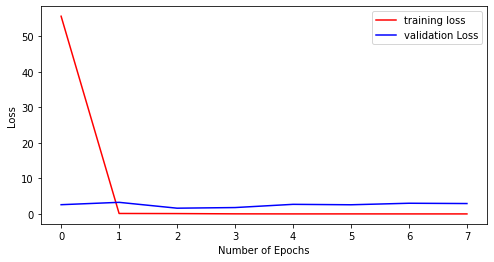

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(range(8), history.history['loss'], 'r', label='training loss')
plt.plot(range(8), history.history['val_loss'], 'b', label='validation Loss')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel("Loss")
plt.show()

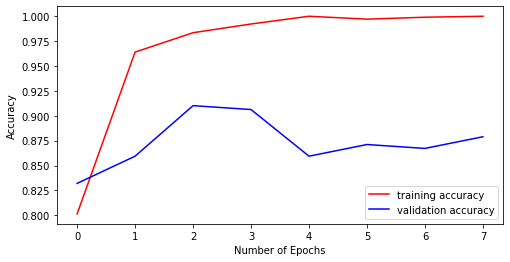

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(range(8), history.history['accuracy'], 'r', label='training accuracy')
plt.plot(range(8), history.history['val_accuracy'], 'b', label='validation accuracy')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel("Accuracy")
plt.show()

In [7]:
model.save_weights('My_model.h5')
model.load_weights('My_model.h5')

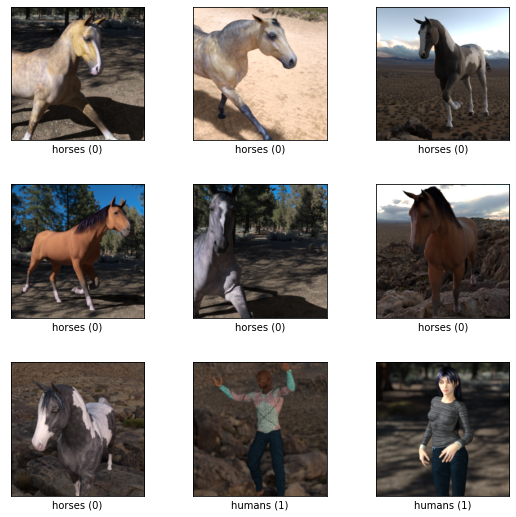

In [8]:
ds, info = tfds.load('horses_or_humans', split='train', with_info=True)

fig = tfds.show_examples(ds, info)

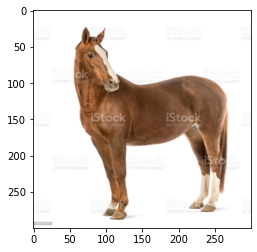

In [9]:
from tensorflow.python.keras.preprocessing import image
from PIL import Image
from urllib import request
from io import BytesIO

# Loading image from URL
url = "https://media.istockphoto.com/photos/horse-looking-at-camera-in-front-of-white-background-picture-id824257724"
res = request.urlopen(url).read()
Test_Image = Image.open(BytesIO(res)).resize((300,300))

plt.imshow(Test_Image)

In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np
path = 'images/20190829-164925-L_68Mb_final.png'
# loads the image and resizes
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

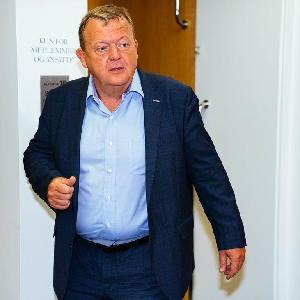

In [11]:
img

In [12]:
classes = model.predict(x)
if classes[0].all() > 0.5:
    print(" Image is a human")
else:
    print(" Image is a horse")

 Image is a human


In [13]:
path = 'images/Nordic-Health-Magnesium-Hesteviden.png'

img2 = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img2)
x = np.expand_dims(x, axis=0)

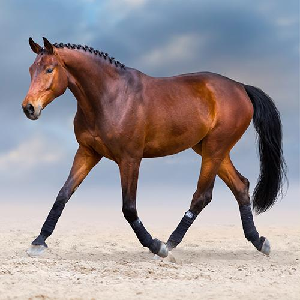

In [14]:
img2

In [15]:
classes = model.predict(x)
if classes[0].all() > 0.5:
    print(" Image is a human")
else:
    print(" Image is a horse")

 Image is a horse
